<a href="https://colab.research.google.com/github/MarkusNeusinger/defichain-data-toolkit/blob/main/notebooks/daily_dfi_burn_emission.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Daily DFI Burn/Emission, 7 day moving avg

In [1]:
import os, sys
import matplotlib.pyplot as plt
from datetime import datetime, timedelta

# import defichain-data-toolkit utils
if os.path.isdir('defichain-data-toolkit'): os.system('rm -rf defichain-data-toolkit')
!git clone https://github.com/MarkusNeusinger/defichain-data-toolkit.git
sys.path.insert(1, 'defichain-data-toolkit')

from utils import fetch_history

print(f"\nNotebook last run: {datetime.utcnow()}")

Cloning into 'defichain-data-toolkit'...
remote: Enumerating objects: 34, done.
remote: Counting objects: 100% (34/34), done.
remote: Compressing objects: 100% (24/24), done.
remote: Total 34 (delta 9), reused 19 (delta 4), pack-reused 0
Receiving objects: 100% (34/34), 459.97 KiB | 10.70 MiB/s, done.
Resolving deltas: 100% (9/9), done.

Notebook last run: 2023-09-20 22:09:45.594864


In [2]:
# fetching data, last 90 days
df = fetch_history('daily', ['Height', 'EmissionTotal', 'BurnedTotal'],
                   from_timestamp=(datetime.utcnow() - timedelta(days=90)).strftime("%Y-%m-%dT%H:%M:%S"))
df.sort_values('datetime_utc', ascending=True, inplace=True)
df.head()

100%|██████████| 3/3 [00:00<00:00, 10.24it/s]


,datetime_utc,burnedtotal,height,emissiontotal
0,2023-06-23,3.176473e+08,3.045378e+06,136.626606
1,2023-06-24,3.176473e+08,3.048301e+06,136.626606
2,2023-06-25,3.176473e+08,3.051180e+06,135.819112
3,2023-06-26,3.176474e+08,3.054095e+06,134.361336
4,2023-06-27,3.176490e+08,3.056944e+06,134.361336


In [3]:
# calculate 1day diff
df['time_diff'] = df['datetime_utc'].diff().dt.total_seconds()
df['height_diff'] = df['height'].diff()
df['burn_diff'] = df['burnedtotal'].diff()

# drop rows with diff > 1day or nan
df = df[df['time_diff'] == 86400].copy()
df['emission'] = df['emissiontotal'] * df['height_diff']
df['burn'] = df['burn_diff']

# calculate 7 day moving avg
df['burn_7day_avg'] = df['burn'].rolling(window=7).mean()
df['emission_7day_avg'] = df['emission'].rolling(window=7).mean()

df.tail()

,datetime_utc,burnedtotal,height,emissiontotal,time_diff,height_diff,burn_diff,emission,burn,burn_7day_avg,emission_7day_avg
85,2023-09-16,3.177318e+08,3.289773e+06,119.521922,86400.0,2907.912688,30.536526,347559.314513,30.536526,2587.229696,347238.995113
86,2023-09-17,3.177319e+08,3.292675e+06,119.521922,86400.0,2902.110367,28.464763,346865.809952,28.464763,2582.324889,346346.861010
87,2023-09-18,3.177503e+08,3.295582e+06,119.521922,86400.0,2906.973990,18375.971268,347447.119566,18375.971268,3559.066835,346204.934152
88,2023-09-19,3.177534e+08,3.298570e+06,119.521922,86400.0,2988.092581,3193.514616,357142.569512,3193.514616,3099.342783,346954.997696
89,2023-09-20,3.177535e+08,3.301294e+06,119.521922,86400.0,2723.514120,26.986219,325519.643183,26.986219,3100.913390,344093.090823


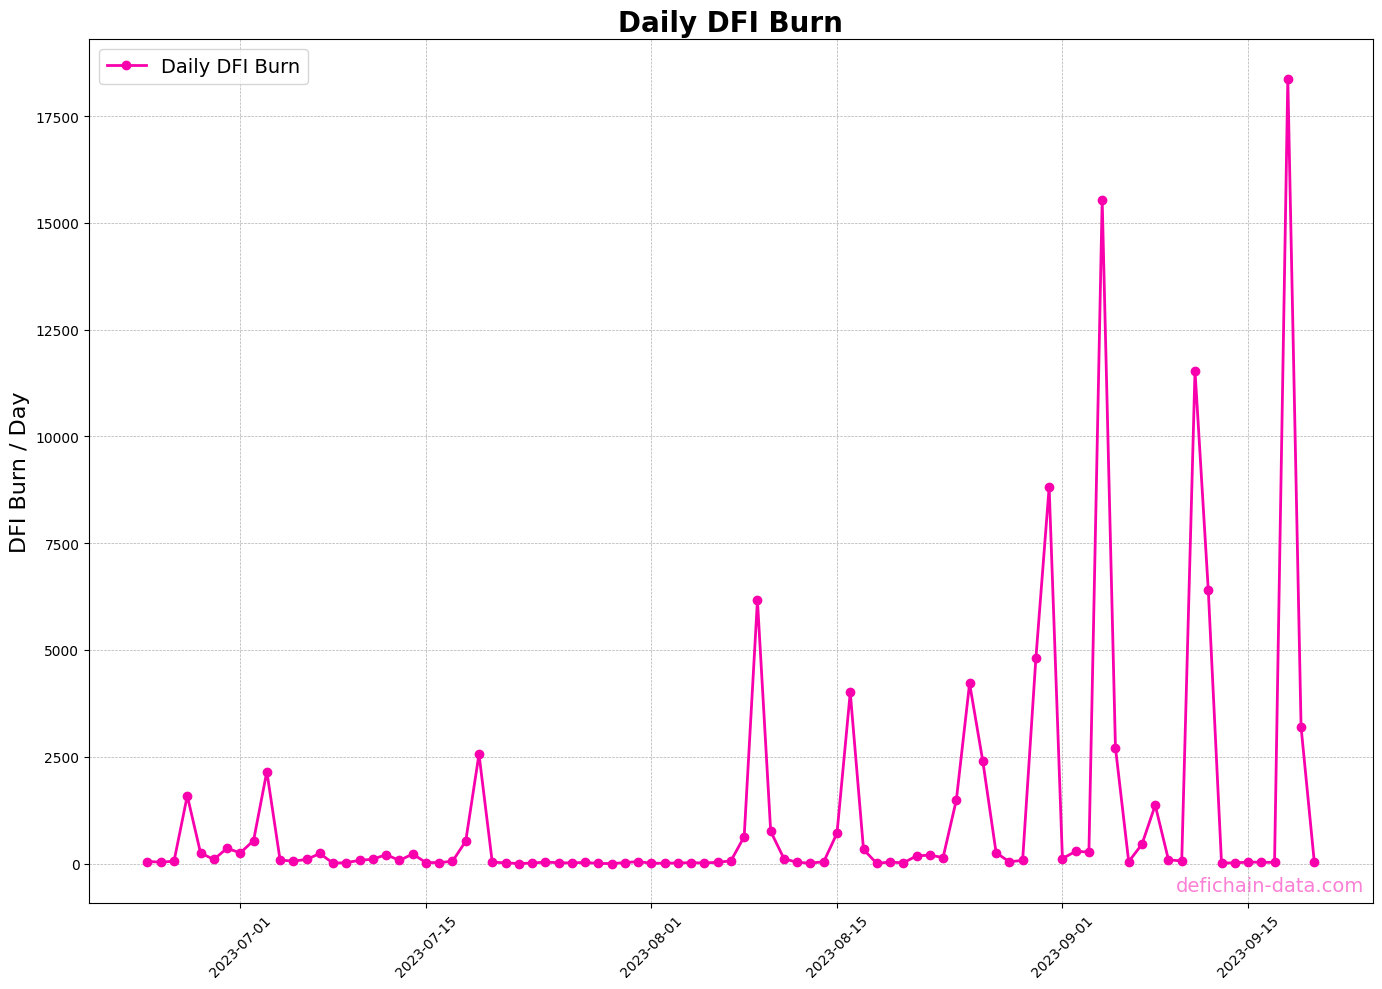

In [4]:
# Plotting Daily burn
fig, axs = plt.subplots(nrows=1, ncols=1, figsize=(14, 10))

axs.plot(df['datetime_utc'], df['burn'], marker='o', linestyle='-', linewidth=2,
         markersize=6, color='#F800AB', label='Daily DFI Burn')

axs.set_title('Daily DFI Burn', fontsize=20, fontweight='bold')
axs.set_xlabel(None, fontsize=16)
axs.set_ylabel('DFI Burn / Day', fontsize=16)

axs.grid(which='both', linestyle='--', linewidth=0.5)
axs.legend(fontsize=14)
plt.xticks(rotation=45)

axs.text(0.92, 0.02, 'defichain-data.com', ha='center', va='center', transform=axs.transAxes,
         fontsize=14, color='#F800AB', alpha=0.5)

plt.tight_layout()
plt.savefig('Daily_DFI_Burn.png', dpi=300)
plt.show()

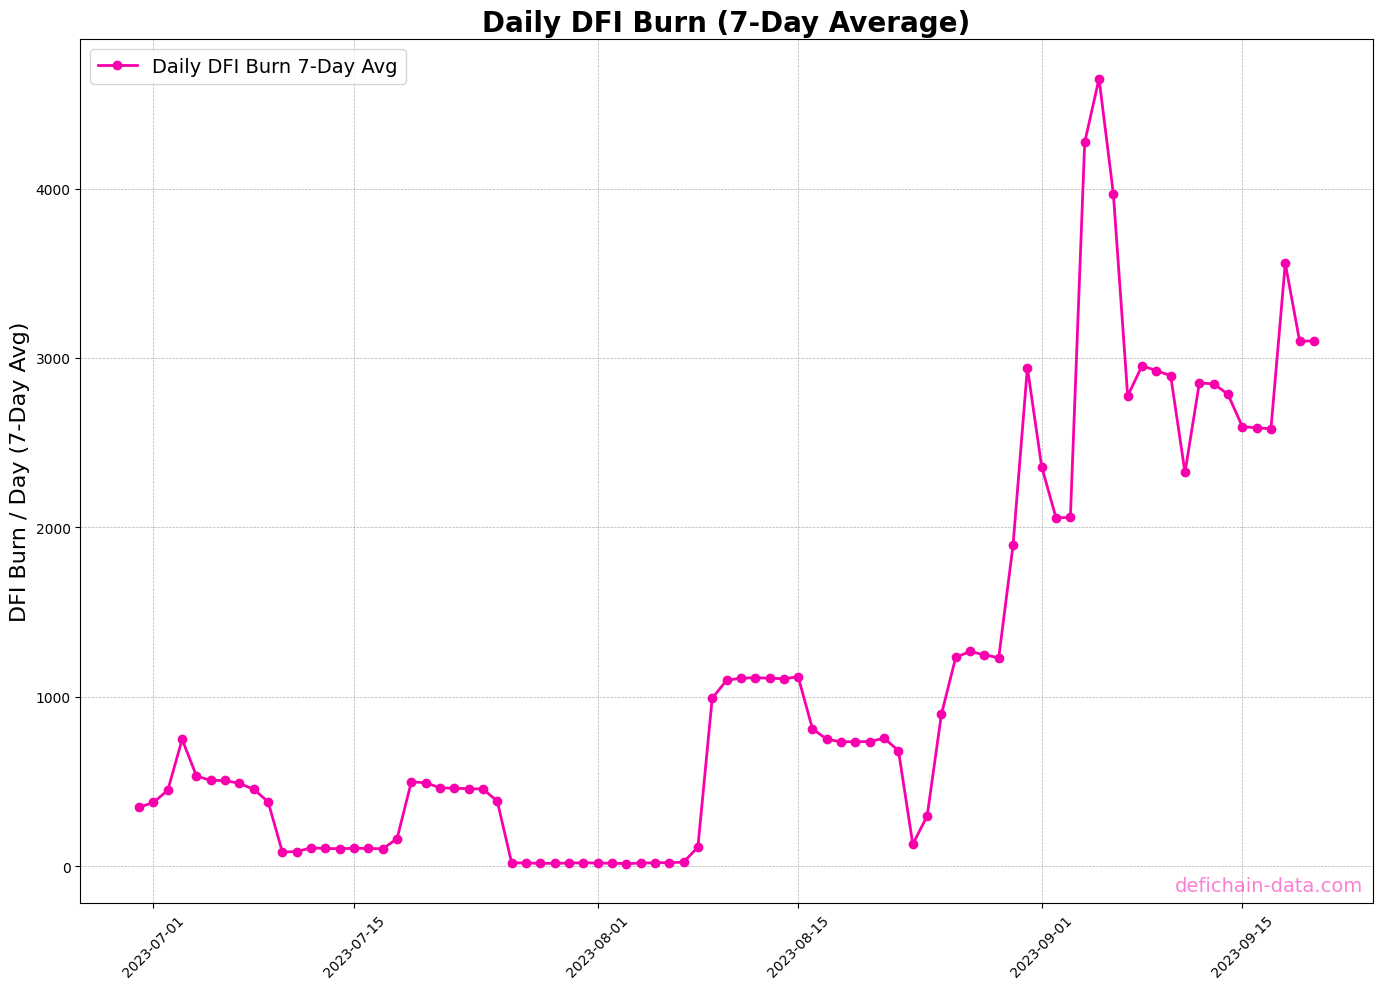

In [5]:
# Plotting Daily 7-day average burn
fig, axs = plt.subplots(nrows=1, ncols=1, figsize=(14, 10))

axs.plot(df['datetime_utc'], df['burn_7day_avg'], marker='o', linestyle='-', linewidth=2,
         markersize=6, color='#F800AB', label='Daily DFI Burn 7-Day Avg')

axs.set_title('Daily DFI Burn (7-Day Average)', fontsize=20, fontweight='bold')
axs.set_xlabel(None, fontsize=16)
axs.set_ylabel('DFI Burn / Day (7-Day Avg)', fontsize=16)

axs.grid(which='both', linestyle='--', linewidth=0.5)
axs.legend(fontsize=14)
plt.xticks(rotation=45)

axs.text(0.92, 0.02, 'defichain-data.com', ha='center', va='center', transform=axs.transAxes,
         fontsize=14, color='#F800AB', alpha=0.5)

plt.tight_layout()
plt.savefig('Daily_DFI_Burn_7day.png', dpi=300)
plt.show()

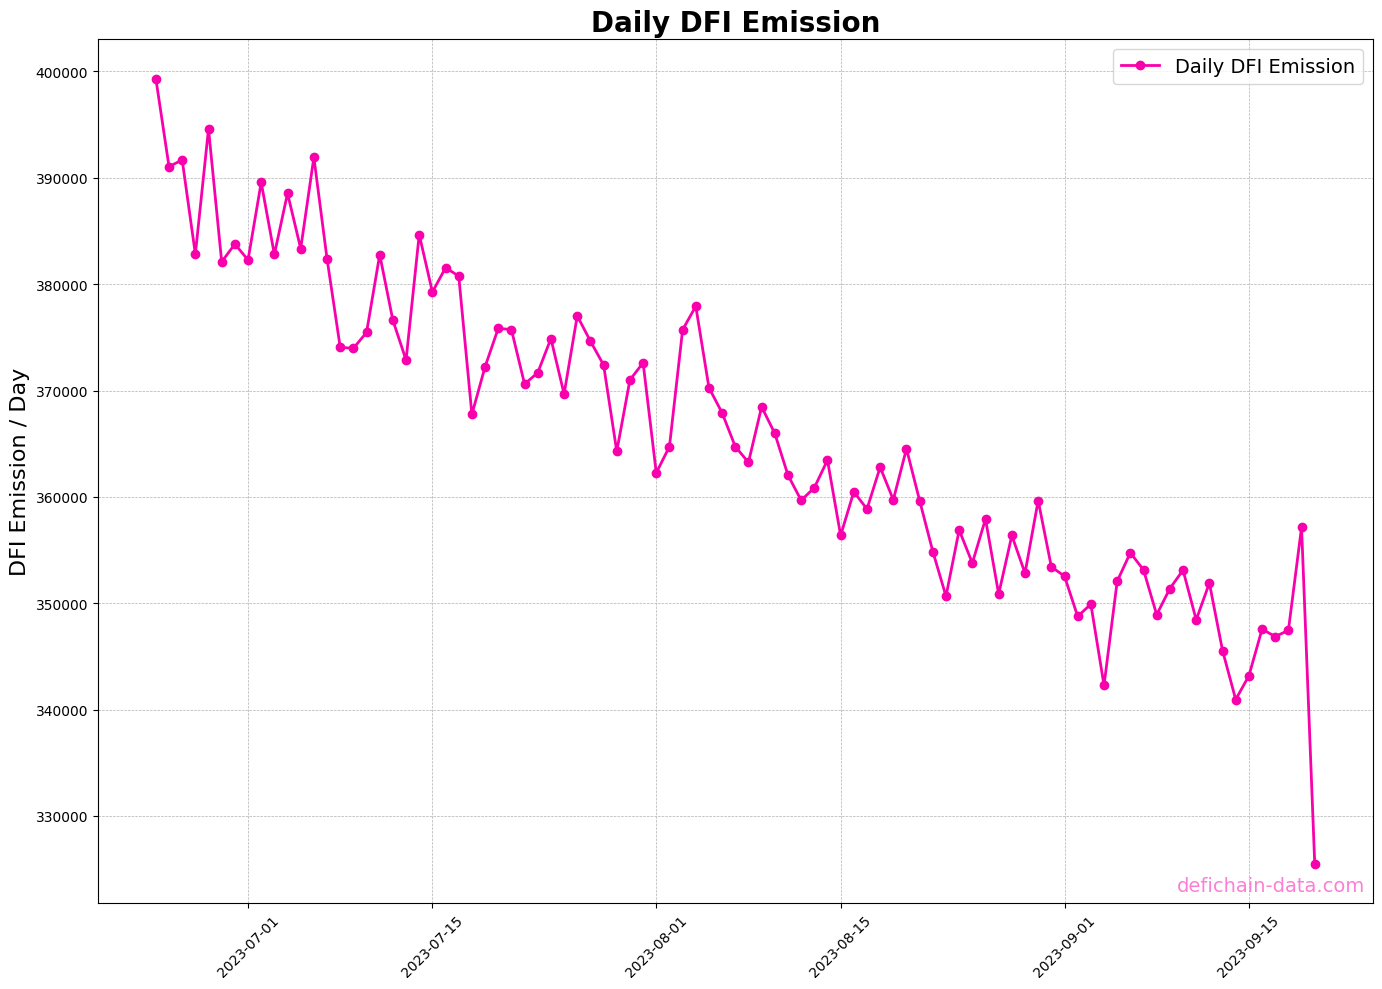

In [6]:
# Plotting Daily Emission
fig, axs = plt.subplots(nrows=1, ncols=1, figsize=(14, 10))

axs.plot(df['datetime_utc'], df['emission'], marker='o', linestyle='-', linewidth=2,
         markersize=6, color='#F800AB', label='Daily DFI Emission')

axs.set_title('Daily DFI Emission', fontsize=20, fontweight='bold')
axs.set_xlabel(None, fontsize=16)
axs.set_ylabel('DFI Emission / Day', fontsize=16)

axs.grid(which='both', linestyle='--', linewidth=0.5)
axs.legend(fontsize=14)
plt.xticks(rotation=45)

axs.text(0.92, 0.02, 'defichain-data.com', ha='center', va='center', transform=axs.transAxes,
         fontsize=14, color='#F800AB', alpha=0.5)

plt.tight_layout()
plt.savefig('Daily_DFI_Emission.png', dpi=300)
plt.show()

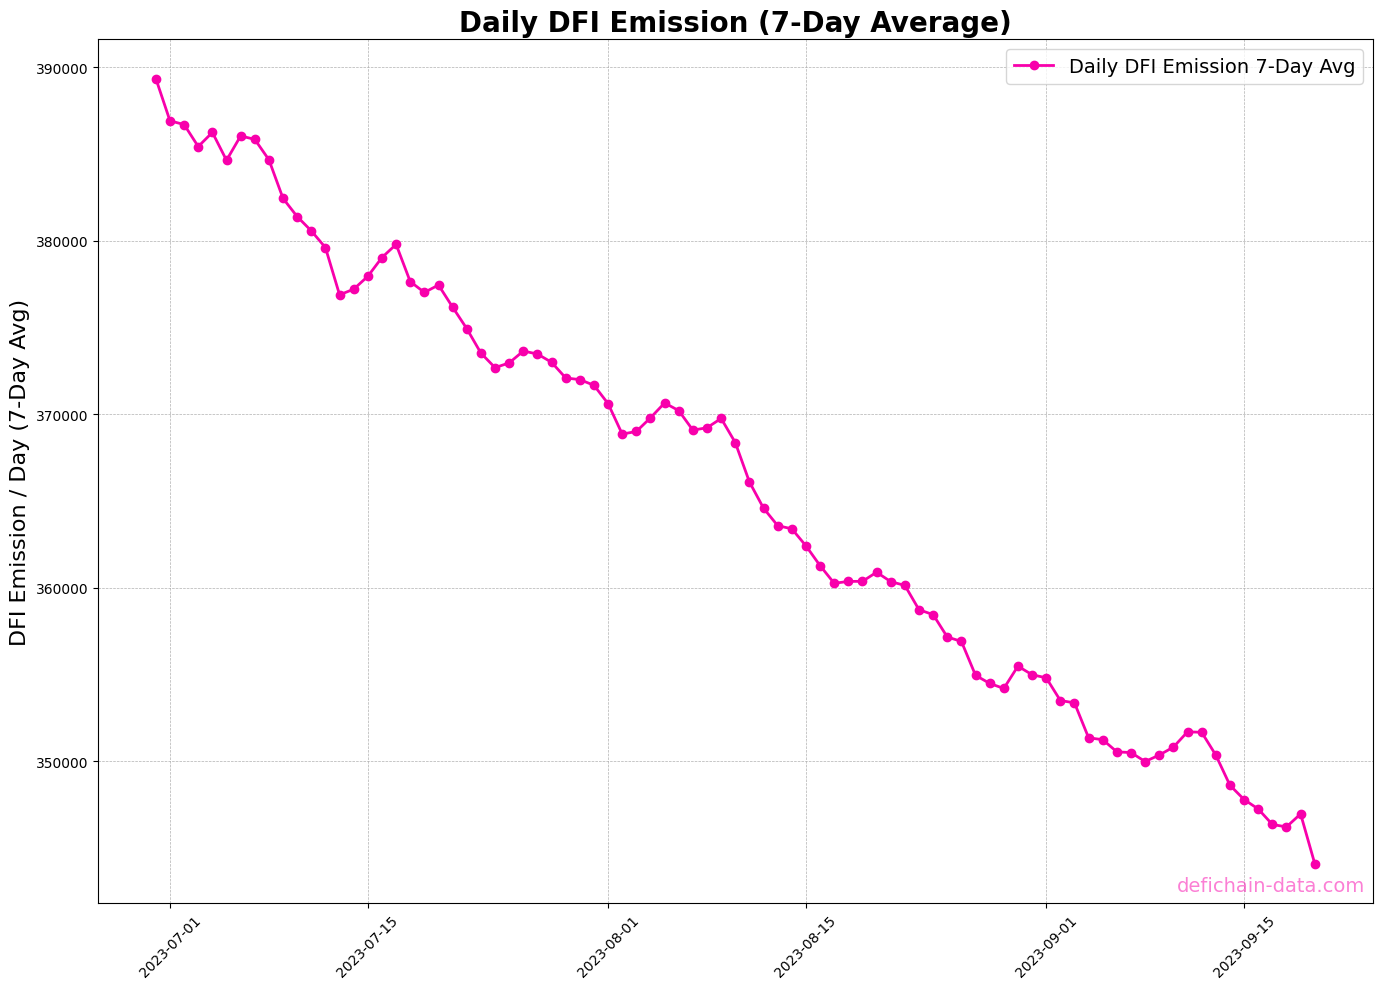

In [7]:
# Plotting Daily 7-Day Avg Emission
fig, axs = plt.subplots(nrows=1, ncols=1, figsize=(14, 10))

axs.plot(df['datetime_utc'], df['emission_7day_avg'], marker='o', linestyle='-', linewidth=2,
         markersize=6, color='#F800AB', label='Daily DFI Emission 7-Day Avg')

axs.set_title('Daily DFI Emission (7-Day Average)', fontsize=20, fontweight='bold')
axs.set_xlabel(None, fontsize=16)
axs.set_ylabel('DFI Emission / Day (7-Day Avg)', fontsize=16)

axs.grid(which='both', linestyle='--', linewidth=0.5)
axs.legend(fontsize=14)
plt.xticks(rotation=45)

axs.text(0.92, 0.02, 'defichain-data.com', ha='center', va='center', transform=axs.transAxes,
         fontsize=14, color='#F800AB', alpha=0.5)

plt.tight_layout()
plt.savefig('Daily_DFI_Emission_7day.png', dpi=300)
plt.show()